# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

Answer: If a user buys 100 loot boxes, it is most likely that he will get 15 elixirs.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

Answer: There is no definite number of boxes that will guarantee a player an elixir. 

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

Answer: X is a discrete random variable because its possible values form a finite and countable set (from 0 to 100). Each event of opening a loot box will get the player either 0 or 1 elixir.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Answer: Binomial distribution, because we have fixed n = 100  independent Bernoulli trials.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<Container object of 30 artists>

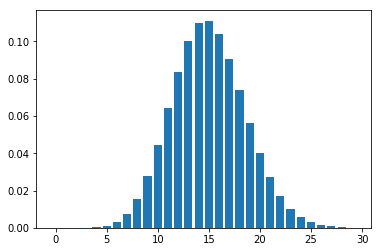

In [3]:
#Using pdf/ cdf method

p_elixir = .15
n_boxes = 100

no_elixir_distribution = stats.binom(n_boxes, p_elixir)

possible_elixirs = list(range(30))

plt.bar(possible_elixirs,
        no_elixir_distribution.pmf(possible_elixirs))

In [4]:
prob_20orless = 0
for x in range(0,21):
    prob_20orless += no_elixir_distribution.pmf(x)

prob_morethan20 = 1 - prob_20orless

print(prob_morethan20) 

#Answer: 6.63%

0.06631976581888699


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

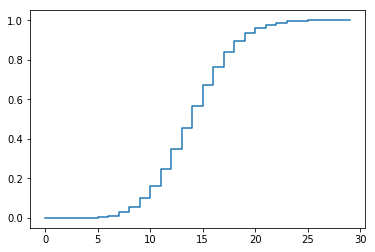

In [5]:
plt.step(possible_elixirs,
        no_elixir_distribution.cdf(possible_elixirs))

In [6]:
prob_morethan20 = 1 - no_elixir_distribution.cdf(20)

In [7]:
prob_morethan20 #Answer: 6.63%

0.06631976581888166

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

Answer: The chance that a user gets more than 20 elixirs is 6.6%. This is a lower than 1 in 10 chance.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

Answer: Poisson distribution, since Y measures the number of events occuring (number of boxes each person purchase) in a fixed time frame (one month).

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [8]:
avg_boxes_purchased = 2.7
expected_revenue = 500_000

#Reminder: Each box is $1

no_users_expected = int(round(expected_revenue / avg_boxes_purchased,-3))

In [9]:
no_users_expected

# We need 185,000 users on the platform.

185000

#### 4c. Assume that your platform has the number of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

<Container object of 15 artists>

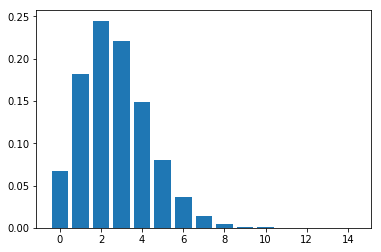

In [10]:
avg_boxes_purchased = 2.7

distn = stats.poisson(avg_boxes_purchased)

possible_users = list(range(15))
plt.bar(possible_users,
        distn.pmf(possible_users))

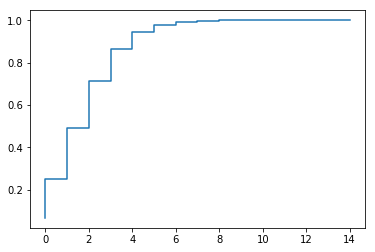

In [11]:
plt.step(possible_users,
        distn.cdf(possible_users))

In [12]:
prob_lessthan_5 = distn.cdf(4)

expected_no_high_value_users = no_users_expected * (1 - prob_lessthan_5)

expected_no_low_value_users = no_users_expected * prob_lessthan_5

print(f'The expected no. of high value users:  {int((round(expected_no_high_value_users)))}.')
print(f'The expected no. of low value users: {int((round(expected_no_low_value_users)))}.')

The expected no. of high value users:  25362.
The expected no. of low value users: 159638.


In [13]:
#LOW VALUE
amount_spent = 0
for x in range(5): #this runs from 0 to 4 only, technically the same if we do range (1,5) since 0 earns $0.
    amount_spent += no_users_expected * distn.pmf(x) * x
amt_spent_low_value_users = amount_spent

#HIGH VALUE
amount_spent = 0
for x in range(5,15): #set arbitrary ending number
    amount_spent += no_users_expected * distn.pmf(x) * x
amt_spent_high_value_users = amount_spent

print(f'The expected amount earned from high value users:  ${(round(amt_spent_high_value_users ,2))}.')
print(f'The expected amount earned from low value users: ${(round(amt_spent_low_value_users ,2))}.')

The expected amount earned from high value users:  $142810.45.
The expected amount earned from low value users: $356689.04.


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

Answer: 

Total of 185,000 users on the platform purchased loot boxes. 

25,000 users purchased 5 or more loot boxes, while the remaining 16,000 purchased less than 5. 

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [14]:
# No need
np.random.seed()

In [18]:
test_list = []

elixirtest = np.random.choice([1,0],p=[0.15,0.85])

for x in range(100_000):
    for when_elixir_occurs in range(1000): #Set 1000 as an arbitary largest number
        if np.random.choice(elixirtest) == 1:
            test_list.append(when_elixir_occurs)
            break

In [24]:
print(f'5th percentile: {np.percentile(test_list, 5)}')
print(f'25th percentile: {np.percentile(test_list, 25)}')
print(f'50th percentile: {np.percentile(test_list, 50)}')
print(f'75th percentile: {np.percentile(test_list, 75)}')
print(f'90th percentile: {np.percentile(test_list, 90)}')


5th percentile: 0.0
25th percentile: 1.0
50th percentile: 4.0
75th percentile: 8.0
90th percentile: 14.0


Answer: It takes an average person 4 lootboxes to get their first elixir. 90% of users get the first elixir after 14 lootboxes.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Answer: Int should be used because the number of trials it takes to get an item from a loot box is finite.

Dictionary is best to store the whole set, because its values are unique. In each key-value pair, the key can be the items (elixir, pendant, armor, coin) and the value can store a list of different data types (% of time in int, valuable-ness in string, and number of trials it takes to get the item in int).

For e.g.

dict = {'steel armor':[30, 'semi-valuable', 3], 'golden pendant': [9,'valuable', 10], <...>}

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Answer: 


For the player's excitement to find an item in the loot box,
1. Probability of receiving any item/ a most valuable item from opening a loot box

Since revenue matters most in the business at the end of the day,
1. Total amount spent by all users who purchase loot boxes in game
2. Number of high value users

END